In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt

In [2]:

def extract_data_within_intervals(base_path, level):
    participants = ['pp1', 'pp3', 'pp4',  'pp6', 'pp7', 'pp8', 'pp9']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'IK')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.mot'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(10), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.mot', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 200
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        #print(joint_data_filtered)
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/OlderData_vEMG/OlderData_vEMG'  # Adjust this path as needed
joint_data_within_intervals = extract_data_within_intervals(base_path, 'anterior_1')
joint_data_high = np.concatenate([
    extract_data_within_intervals(base_path, 'anterior_3'), 
    extract_data_within_intervals(base_path, 'anterior_2')
], axis=0)

In [3]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

In [4]:
average_joint = stack_joint_data(joint_data_within_intervals)
average_joint_high = stack_joint_data(joint_data_high)

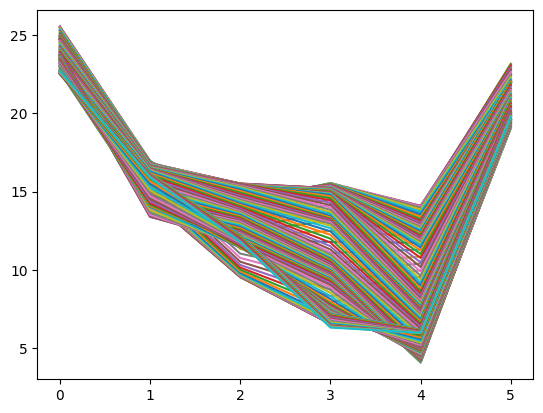

In [5]:
hip_flexion_l_new = average_joint['hip_flexion_l']
hip_flexion_r_new = average_joint['hip_flexion_r']
ankle_angle_l_new = average_joint['ankle_angle_l']
ankle_angle_r_new = average_joint['ankle_angle_r']

hip_flexion_l_new_high = average_joint_high['hip_flexion_l']
hip_flexion_r_new_high = average_joint_high['hip_flexion_r']

ankle_angle_l_new_high = average_joint_high['ankle_angle_l']
ankle_angle_r_new_high = average_joint_high['ankle_angle_r']

knee_angle_l_new = -average_joint['knee_angle_l']
knee_angle_r_new = -average_joint['knee_angle_r']

plt.plot(knee_angle_l_new)
plt.show()

In [6]:
def extract_data_within_intervals(base_path, level):
    participants = ['pp1', 'pp3',  'pp4',  'pp6', 'pp7', 'pp8', 'pp9']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'ID')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.sto'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(6), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.sto', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 200
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/OlderData_vEMG/OlderData_vEMG'  # Adjust this path as needed
torque_data_within_intervals = extract_data_within_intervals(base_path, 'anterior_1')
torque_data_high = np.concatenate([extract_data_within_intervals(base_path, 'anterior_3'), extract_data_within_intervals(base_path, 'anterior_2')], axis = 0)

In [7]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

In [8]:
average_torque = stack_joint_data(torque_data_within_intervals)
average_torque_high = stack_joint_data(torque_data_high)

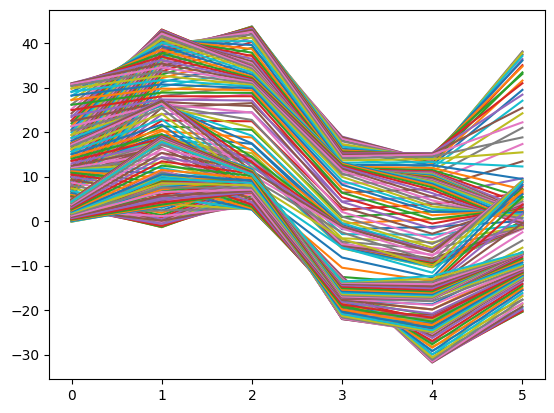

In [9]:
hip_flexion_l_m_new = average_torque['hip_flexion_l_moment']
hip_flexion_r_m_new = average_torque['hip_flexion_r_moment']
ankle_angle_l_m_new = average_torque['ankle_angle_l_moment']
ankle_angle_r_m_new = average_torque['ankle_angle_r_moment']

hip_flexion_l_m_high = average_torque_high['hip_flexion_l_moment']
hip_flexion_r_m_high = average_torque_high['hip_flexion_r_moment']
ankle_angle_l_m_high = average_torque_high['ankle_angle_l_moment']
ankle_angle_r_m_high = average_torque_high['ankle_angle_r_moment']

knee_angle_l_m_new = average_torque['knee_angle_l_moment']
knee_angle_r_m_new = average_torque['knee_angle_r_moment']

plt.plot(knee_angle_r_m_new)
plt.show()

In [10]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name_80 = '2025_02_10_13_44_020SAC'#'2025_01_24_00_17_040SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
name_60 = '2025_02_11_09_54_530SAC'#'2025_01_24_22_03_170SAC'
name_40 = '2025_02_12_00_04_090SAC' #'2025_01_25_12_05_250SAC'
env_name = 'myoSarcTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)



In [11]:
stand_80, stand_60, stand_40 = [], [], []
fall_80, fall_60, fall_40 = [], [], []

for i in range(ep):
    file_path = pkl_path + name_80 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_80.append(filtered_data)


for i in range(ep):
    file_path = pkl_path + name_60 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_60.append(filtered_data)

for i in range(ep):
    file_path = pkl_path + name_40 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_40.append(filtered_data)
    
print(len(stand_80), len(stand_60))
mass = 150

100 97


In [12]:
print(len(stand_40))

58


In [13]:
pert_80_AP, pert_60_AP, pert_40_AP = [], [], []
pert_80_AP_high, pert_60_AP_high, pert_40_AP_high = [], [], []

for data in stand_80:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_80_AP.append(data)
    elif  20 <= acc <= 30:
        pert_80_AP_high.append(data)    


for data in stand_60:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_60_AP.append(data)
    elif  20 <= acc <= 30:
        pert_60_AP_high.append(data)    

for data in stand_40:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_40_AP.append(data)
    elif  20 <= acc <= 30:
        pert_40_AP_high.append(data)   

pert_AP = [pert_80_AP, pert_60_AP, pert_40_AP]

pert_AP_high = [pert_80_AP_high, pert_60_AP_high, pert_40_AP_high]

joint_names_l = ['ankle_angle_l',  'hip_flexion_l', 'knee_angle_l'] #'hip_adduction_l', 'hip_rotation_l',
title = ['Ankle',  'Hip Flexion', 'knee_angle'] #'Hip Adduction', 'Hip Rotation', 
joint_names_r = ['ankle_angle_r', 'hip_flexion_r', 'knee_angle_r'] #'hip_adduction_r','hip_rotation_r',
color = ['dodgerblue', 'orangered', 'lime']

In [14]:
joint_names_l_high = ['ankle_angle_l', 'hip_flexion_l', 'knee_angle_l']
title_high = ['Ankle_high', 'Hip Flexion', 'knee_angle']
joint_names_r_high = ['ankle_angle_r', 'hip_flexion_r', 'knee_angle_r']

In [15]:
time_mo  = np.linspace(0, 2, 200)

200
ankle_exp mean 6.336100362500003 1.4901723445029817
ankle_exp mean 6.336100362500003 1.4901723445029817
ankle_exp mean 6.336100362500003 1.4901723445029817
sim ankle_angle_l 1.7755614949974936 0.20300026910266572
hip_exp mean 3.9649662999999995 1.8048907379618715
hip_exp mean 3.9649662999999995 1.8048907379618715
hip_exp mean 3.9649662999999995 1.8048907379618715
sim hip_flexion_l 1.2594844940277927 0.8650191620472141
sim knee_angle_l 0.060003842845804546 0.0072188606533182785
ankle_exp torque mean 39.922011150833335 8.715120761465673
ankle_exp torque mean 39.922011150833335 8.715120761465673
ankle_exp torque mean 39.922011150833335 8.715120761465673
sim ankle_angle_l 8.83241988954025 1.5323407506944366


C:\Users\chery\AppData\Local\Temp\ipykernel_44252\4220575576.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\chery\AppData\Local\Temp\ipykernel_44252\4220575576.py:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+4)


hip_exp torque mean 25.068122048333336 4.483119389738631
hip_exp torque mean 25.068122048333336 4.483119389738631
hip_exp torque mean 25.068122048333336 4.483119389738631
sim hip_flexion_l 8.015348711499536 2.29852889048182
sim knee_angle_l 11.401013403619041 1.8630205093956513


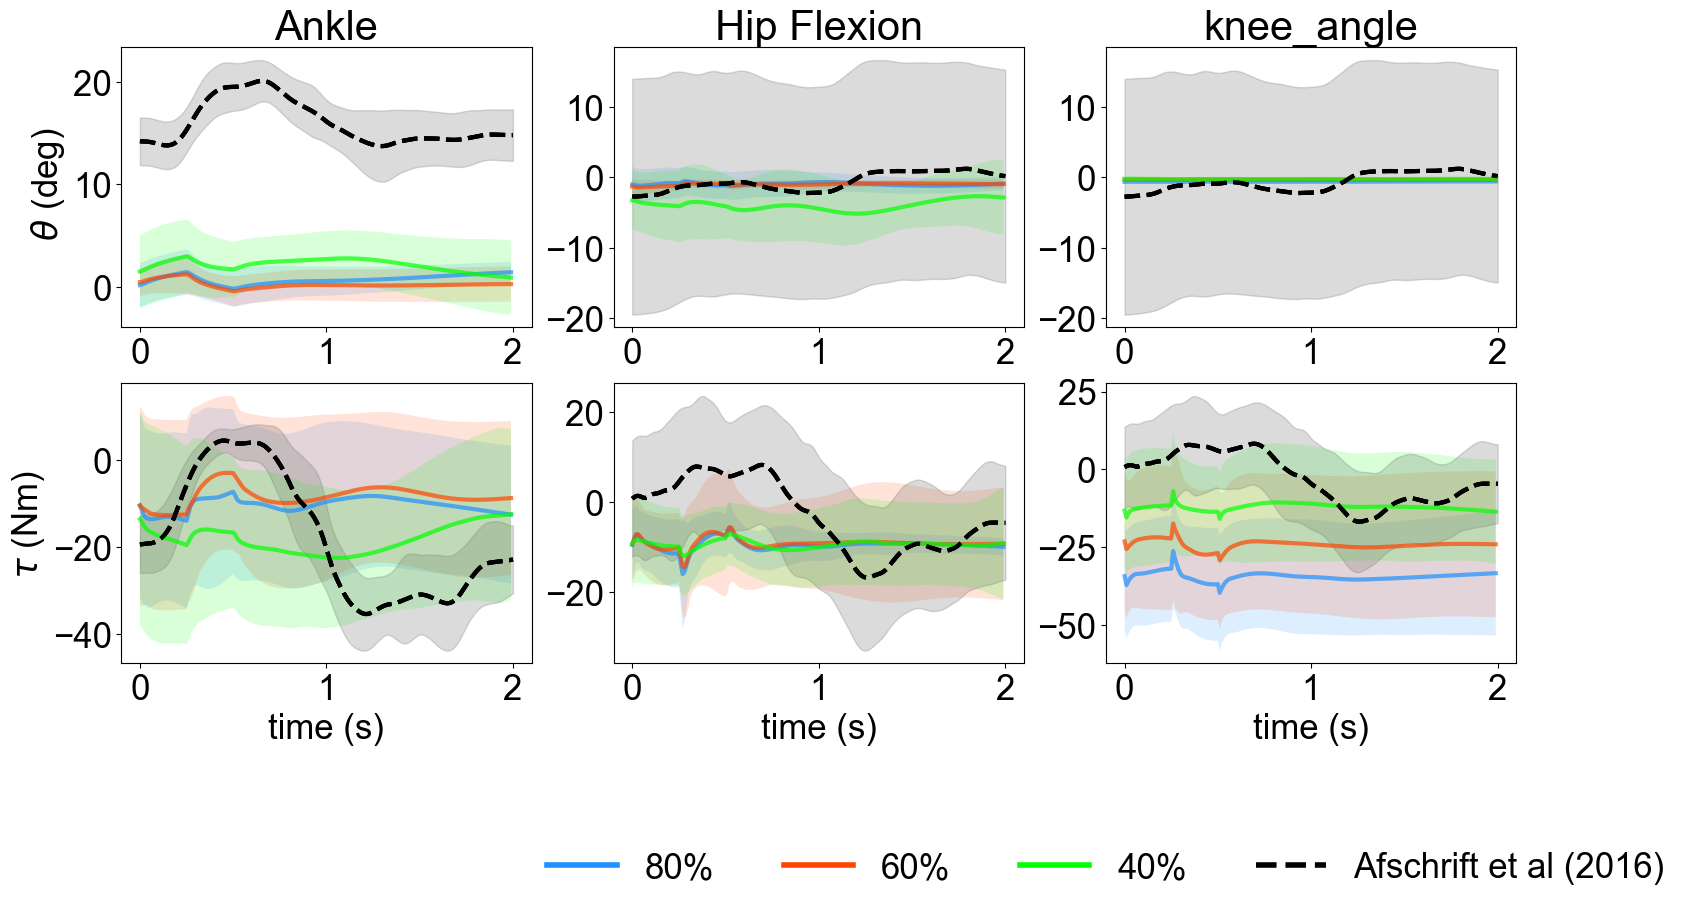

In [19]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

y_range_joint = [-50, 50]
time_len = 200
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))


fig, ax = plt.subplots(2, 2, figsize=(18, 8))

for i in range(0, 3):
    plt.subplot(2, 3, i+1)
    mean_sim = []
    std_sim = []
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            l[j].append(k['jointInfo']['qpos'][joint_names_l[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qpos'][joint_names_r[i]][p_t:p_t+time_len])
            #mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            mean_sim.append(np.max(mean) - np.min(mean))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = color[j], alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = color[j], alpha = 0.15)
            if i == 1:
                hip_flexion_new = np.concatenate((hip_flexion_l_new, hip_flexion_r_new), axis = 0)
                mean_e = np.mean(hip_flexion_new, axis = 0)
                std_e = np.std(hip_flexion_new, axis = 0)
                print('hip_exp mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                # Assuming ankle_angle_l_new and ankle_angle_r_new are both 2D arrays with the same number of columns
                ankle_angle_new = np.concatenate((ankle_angle_l_new, ankle_angle_r_new), axis=0)
                mean_e = np.mean(ankle_angle_new, axis = 0)
                std_e = np.std(ankle_angle_new, axis = 0)
                print('ankle_exp mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    plt.title(title[i])
    print('sim',joint_names_l[i], np.mean(mean_sim), np.std(mean_sim))
    if i == 0:
        plt.ylabel(r' $\theta$ (deg)')



for i in range(0, 3):
    mean_sim = []
    std_sim = []
    plt.subplot(2, 3, i+4)
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qtau'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            mean_sim.append(np.max(mean) - np.min(mean))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = color[j], alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = color[j], alpha = 0.15)
            if i == 1:
                hip_flexion_m_new = np.concatenate((hip_flexion_l_m_new, hip_flexion_r_m_new), axis = 0)
                mean_e = np.mean(hip_flexion_m_new, axis = 0)
                std_e = np.std(hip_flexion_m_new, axis = 0)
                print('hip_exp torque mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                ankle_angle_m_new = np.concatenate((ankle_angle_l_m_new, ankle_angle_r_m_new), axis = 0)
                mean_e = np.mean(ankle_angle_m_new, axis = 0)
                std_e = np.std(ankle_angle_m_new, axis = 0)
                print('ankle_exp torque mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            plt.xlabel('time (s)')
    print('sim',joint_names_l[i], np.mean(mean_sim), np.std(mean_sim))
    if i == 0:
        plt.ylabel(r'$\tau$ (Nm)')



ax[0, 0].set_ylim(-5, 25)
ax[1, 0].set_ylim(-65, 25)
ax[0, 1].set_ylim(-30, 20)
ax[1, 1].set_ylim(-55, 40)

#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
#fig.suptitle('Ankle Strategy', fontsize=40) 
plt.setp(ax, xlim=[0, time_len/100])
plt.legend(labels=['80%', '60%', '40%', 'Afschrift et al (2016)'], 
           loc='lower center', bbox_to_anchor=(0.0, -0.9), ncol=4, frameon = False,
           handles=[
               plt.Line2D([0], [0], color='dodgerblue', lw=4),
               plt.Line2D([0], [0], color='orangered', lw=4),
               plt.Line2D([0], [0], color='lime', lw=4),
               plt.Line2D([0], [0], linestyle='--', color='black', lw=4)
           ])
#fig.suptitle('Hip 
plt.show()
plt.close()

200
ankle_exp mean 10.270654224999998 1.055044242321125
ankle_exp mean 10.270654224999998 1.055044242321125
ankle_exp mean 10.270654224999998 1.055044242321125
sim ankle_angle_l 6.806531963946045 0.4912008710073274
hip_exp mean 4.9873742300000075 0.5822353942047156
hip_exp mean 4.9873742300000075 0.5822353942047156
hip_exp mean 4.9873742300000075 0.5822353942047156
sim hip_flexion_l 4.522102538473798 2.4114552920357473
sim knee_angle_l 0.2697651336034507 0.040542357117106714
ankle_exp torque mean 42.466575000000006 7.417702966542075
ankle_exp torque mean 42.466575000000006 7.417702966542075
ankle_exp torque mean 42.466575000000006 7.417702966542075
sim ankle_angle_l 25.502752031437158 5.212868767772248
hip_exp torque mean 23.076692205 10.158105380649245
hip_exp torque mean 23.076692205 10.158105380649245
hip_exp torque mean 23.076692205 10.158105380649245
sim hip_flexion_l 35.13163571013262 8.335773474532132
sim knee_angle_l 48.50377855012067 6.439665415778201


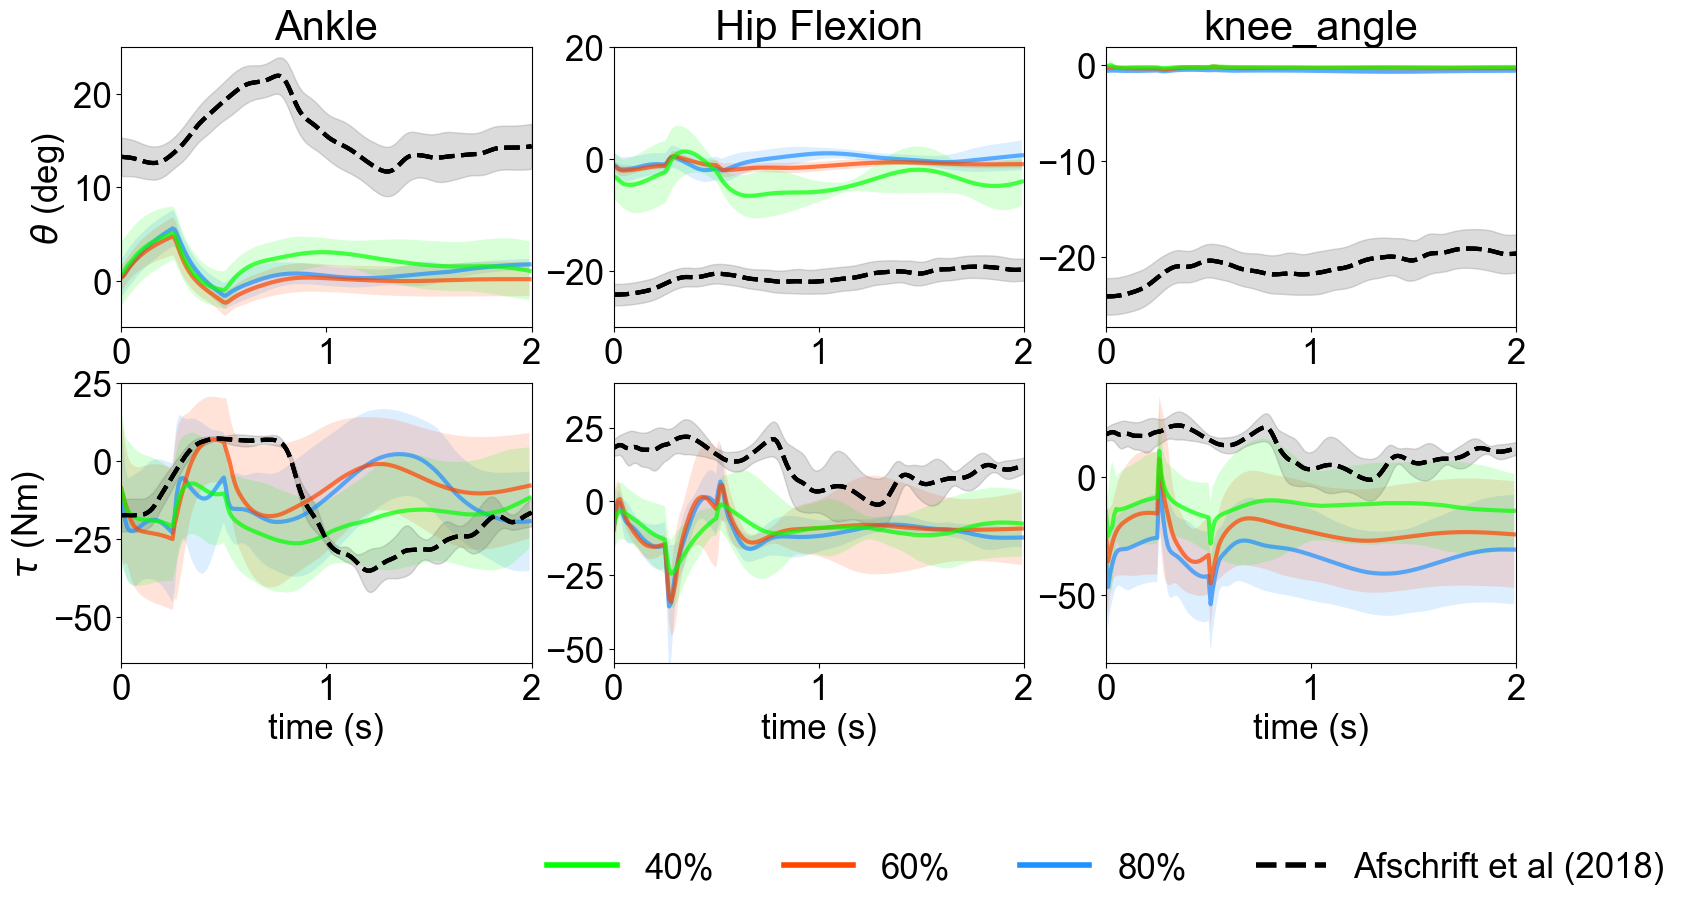

In [22]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

y_range_joint = [-50, 50]
time_len = 200
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))


fig, ax = plt.subplots(2, 3, figsize=(18, 8))
for i in range(0, 3):
    mean_sim = []
    std_sim = []
    plt.subplot(2, 3, i+1)
    for j in range(len(pert_AP_high)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP_high[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_l_high[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qpos'][joint_names_r_high[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            mean_sim.append(np.max(mean) - np.min(mean))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = color[j], alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = color[j], alpha = 0.15)
            if i == 1:
                hip_flex_high = np.concatenate((hip_flexion_l_new_high, hip_flexion_r_new_high), axis= 0)
                mean_e = np.mean(hip_flex_high, axis = 0)
                std_e = np.std(hip_flex_high, axis = 0)
                print('hip_exp mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                ankle_angle_high = np.concatenate((ankle_angle_l_new_high, ankle_angle_r_new_high), axis= 0)
                mean_e = np.mean(ankle_angle_high, axis = 0)
                std_e = np.std(ankle_angle_high, axis = 0)
                print('ankle_exp mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    print('sim',joint_names_l[i], np.mean(mean_sim), np.std(mean_sim))
    plt.title(title[i])
    if i == 0:
        plt.ylabel(r'$\theta$ (deg)')



for i in range(0, 3):
    mean_sim = []
    std_sim = []
    plt.subplot(2, 3, i+4)
    for j in range(len(pert_AP_high)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP_high[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l_high[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qtau'][joint_names_r_high[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            mean_sim.append(np.max(mean) - np.min(mean))
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = color[j], alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = color[j], alpha = 0.15)
            if i == 1:
                hip_flex_m_high = np.concatenate((hip_flexion_l_m_high, hip_flexion_r_m_high), axis= 0)
                mean_e = np.mean(hip_flex_m_high, axis = 0)
                std_e = np.std(hip_flex_m_high, axis = 0)
                print('hip_exp torque mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            elif i == 0:
                ankle_angle_m_high = np.concatenate((ankle_angle_l_m_high, ankle_angle_r_m_high), axis= 0)
                mean_e = np.mean(ankle_angle_m_high, axis = 0)
                std_e = np.std(ankle_angle_m_high, axis = 0)
                print('ankle_exp torque mean', np.max(mean_e) - np.min(mean_e), np.max( std_e) - np.min(std_e))
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            plt.xlabel('time (s)')
    print('sim',joint_names_l[i], np.mean(mean_sim), np.std(mean_sim))
    if i == 0:
        plt.ylabel(r'$\tau$ (Nm)')



ax[0, 0].set_ylim(-5, 25)
ax[1, 0].set_ylim(-65, 25)
ax[0, 1].set_ylim(-30, 20)
ax[1, 1].set_ylim(-55, 40)


#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
plt.setp(ax, xlim=[0, time_len/100])
plt.legend(labels=['40%', '60%',  '80%', 'Afschrift et al (2018)'], 
           loc='lower center', bbox_to_anchor=(0.0, -0.9), ncol=4, frameon = False,
           handles=[
               plt.Line2D([0], [0], color='lime', lw=4),
               plt.Line2D([0], [0], color='orangered', lw=4),
               plt.Line2D([0], [0], color='dodgerblue', lw=4),
               plt.Line2D([0], [0], linestyle='--', color='black', lw=4)
           ])
#fig.suptitle('Hip Strategy', fontsize=40) 
plt.show()
plt.close()